In [1]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

import matplotlib.pyplot as plt
import numpy as np

In [2]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

(trainset[3][0]).shape

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


torch.Size([1, 28, 28])

In [4]:
#figure0 = plt.figure()
ind = []
for i in range (len(labels)):
    if (0 == labels.numpy()[i]):
        ind.append(i)
        #plt.subplot(6,10,i)
        #plt.imshow(images[i].numpy().squeeze(), cmap='gray_r');
labels

tensor([0, 8, 1, 0, 0, 6, 7, 6, 7, 3, 0, 7, 9, 7, 5, 1, 1, 5, 8, 9, 7, 0, 1, 5,
        6, 9, 9, 0, 0, 2, 2, 4, 3, 0, 7, 0, 3, 7, 1, 8, 9, 0, 3, 6, 5, 5, 7, 9,
        6, 4, 2, 6, 8, 5, 6, 1, 4, 1, 3, 7, 9, 7, 6, 1])

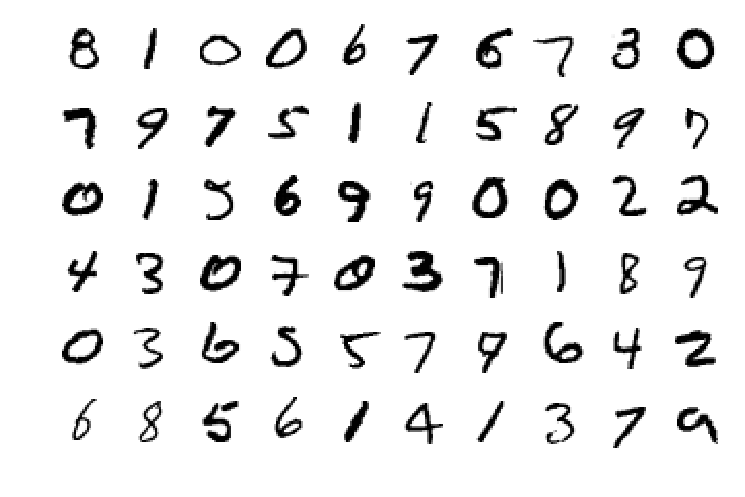

In [5]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [6]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [7]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [8]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-8.0482e-04, -8.0482e-04, -8.0482e-04,  ..., -8.0482e-04,
         -8.0482e-04, -8.0482e-04],
        [-2.3258e-03, -2.3258e-03, -2.3258e-03,  ..., -2.3258e-03,
         -2.3258e-03, -2.3258e-03],
        [ 4.9886e-05,  4.9886e-05,  4.9886e-05,  ...,  4.9886e-05,
          4.9886e-05,  4.9886e-05],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 3.5536e-04,  3.5536e-04,  3.5536e-04,  ...,  3.5536e-04,
          3.5536e-04,  3.5536e-04],
        [-6.3034e-04, -6.3034e-04, -6.3034e-04,  ..., -6.3034e-04,
         -6.3034e-04, -6.3034e-04]])


In [9]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [10]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0080,  0.0038, -0.0144,  ..., -0.0311,  0.0053, -0.0272],
        [-0.0259, -0.0298,  0.0058,  ...,  0.0061,  0.0030,  0.0287],
        [-0.0196,  0.0245,  0.0299,  ...,  0.0091, -0.0169, -0.0317],
        ...,
        [ 0.0115,  0.0155, -0.0056,  ...,  0.0138,  0.0050, -0.0207],
        [-0.0065,  0.0113,  0.0172,  ...,  0.0317,  0.0159, -0.0269],
        [ 0.0071,  0.0015,  0.0112,  ..., -0.0225,  0.0224,  0.0252]],
       requires_grad=True)
Gradient - tensor([[ 0.0028,  0.0028,  0.0028,  ...,  0.0028,  0.0028,  0.0028],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0035,  0.0035,  0.0035,  ...,  0.0035,  0.0035,  0.0035],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005]])


In [11]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0079,  0.0037, -0.0145,  ..., -0.0311,  0.0053, -0.0272],
        [-0.0259, -0.0298,  0.0058,  ...,  0.0061,  0.0030,  0.0287],
        [-0.0196,  0.0245,  0.0299,  ...,  0.0091, -0.0169, -0.0317],
        ...,
        [ 0.0115,  0.0155, -0.0056,  ...,  0.0138,  0.0050, -0.0207],
        [-0.0066,  0.0112,  0.0172,  ...,  0.0317,  0.0159, -0.0270],
        [ 0.0071,  0.0015,  0.0112,  ..., -0.0225,  0.0224,  0.0252]],
       requires_grad=True)


In [12]:
epochs=15
train_losses = []
train_counter = []
test_accuracy = []
test_counter = [i*len(trainloader.dataset) for i in range(epochs + 1)]

In [13]:
def train(epoch):
    for e in range(epoch):
        batch_idx = 0
        running_loss = 0
        for images, labels in trainloader:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
            
            # Training pass
            optimizer.zero_grad()
            
            output = model(images)
            loss = criterion(output, labels)
            
            #This is where the model learns by backpropagating
            loss.backward()
            
            #And optimizes its weights here
            optimizer.step()
        
            running_loss += loss.item()
            batch_idx += 1
            
            train_losses.append(loss.item())
            train_counter.append(
              (batch_idx*64) + ((e)*len(trainloader.dataset)))
            #print( (batch_idx*64) + ((e)*len(trainloader.dataset)))
            
        else:
            print("Epoch {} - Training Loss  = {}".format(e, round (running_loss/len(trainloader),6)))
            test()
    print("\nTraining Time (in minutes) = ",(time()-time0)/60)
    

In [16]:
def test():
  correct_count, all_count = 0, 0
  for images,labels in valloader:
    for i in range(len(labels)):
      img = images[i].view(1, 784)
      # Turn off gradients to speed up this part
      with torch.no_grad():
          logps = model(img)

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)
      probab = list(ps.numpy()[0])
      pred_label = probab.index(max(probab))
      true_label = labels.numpy()[i]
      if(true_label == pred_label):
        correct_count += 1
      all_count += 1

  #print("Number Of Images Tested =", all_count)
  print("\t- Model Accuracy = {}". format(correct_count/all_count))
  test_accuracy.append((correct_count/all_count))

In [17]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
test()
train(epochs)


	- Model Accuracy = 0.0869
Epoch 0 - Training Loss  = 0.649155
	- Model Accuracy = 0.9035
Epoch 1 - Training Loss  = 0.282646
	- Model Accuracy = 0.9256
Epoch 2 - Training Loss  = 0.223507
	- Model Accuracy = 0.9395
Epoch 3 - Training Loss  = 0.180179
	- Model Accuracy = 0.9523
Epoch 4 - Training Loss  = 0.151694
	- Model Accuracy = 0.9547
Epoch 5 - Training Loss  = 0.129949
	- Model Accuracy = 0.9595
Epoch 6 - Training Loss  = 0.115125
	- Model Accuracy = 0.9623
Epoch 7 - Training Loss  = 0.102719
	- Model Accuracy = 0.9657
Epoch 8 - Training Loss  = 0.091955
	- Model Accuracy = 0.9683
Epoch 9 - Training Loss  = 0.083357
	- Model Accuracy = 0.9691
Epoch 10 - Training Loss  = 0.07598
	- Model Accuracy = 0.97
Epoch 11 - Training Loss  = 0.070697
	- Model Accuracy = 0.9733
Epoch 12 - Training Loss  = 0.063694
	- Model Accuracy = 0.9732
Epoch 13 - Training Loss  = 0.05997
	- Model Accuracy = 0.9735
Epoch 14 - Training Loss  = 0.054946
	- Model Accuracy = 0.9737

Training Time (in minutes)

In [18]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 6


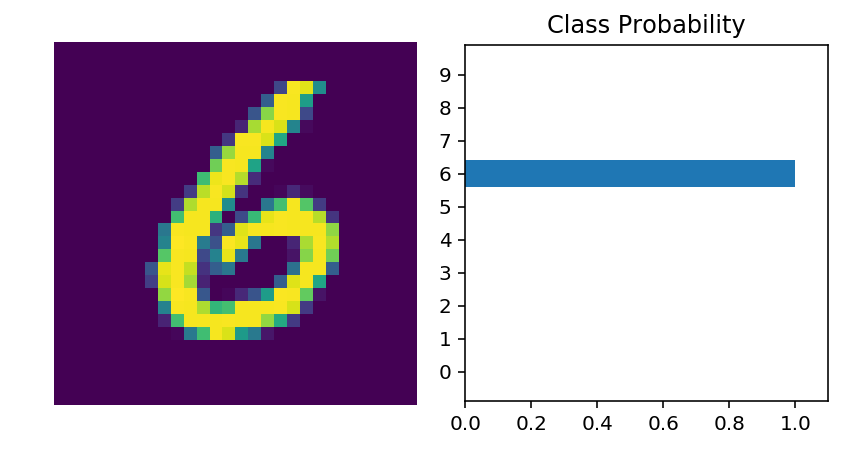

In [19]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [20]:
(0*64) + (2-1)*len(trainloader.dataset)

60000

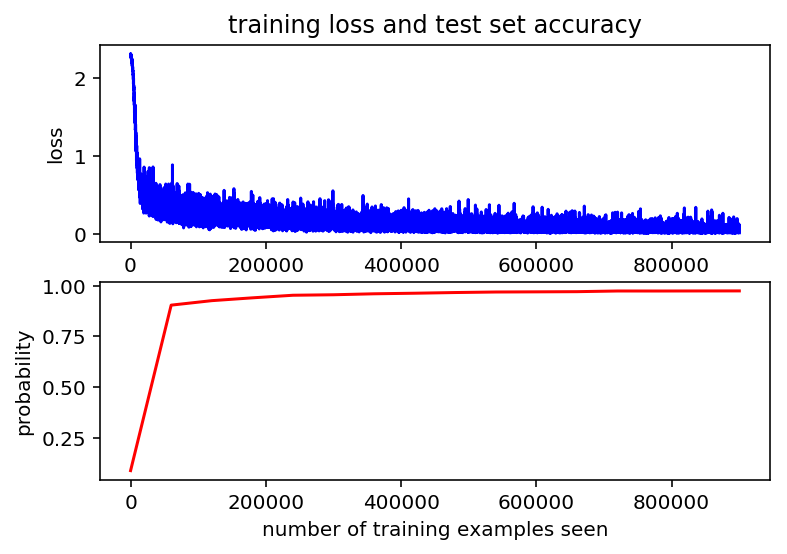

16 16 14070 14070


In [21]:
import matplotlib.pyplot as plt
plt.figure(1)

plt.subplot(211)
plt.plot(train_counter, train_losses, color='blue')
#plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('loss')
plt.title('training loss and test set accuracy')

plt.subplot(212)
plt.plot(test_counter, test_accuracy, color='red')
plt.xlabel('number of training examples seen')
plt.ylabel('probability')

plt.show()
print(len(test_counter),len(test_accuracy),len(train_counter),len(train_losses))

In [22]:
torch.save(model, './my_mnist_model.pt') 

In [23]:
w1=model[0].weight
w2=model[2].weight
w3=model[4].weight
print("w1.size()=",w1.size())
print("w2.size()=",w2.size())
print("w3.size()=",w3.size())

w1.size()= torch.Size([128, 784])
w2.size()= torch.Size([64, 128])
w3.size()= torch.Size([10, 64])


In [24]:
import numpy
weight1=w1.detach().numpy()
weight2=w2.detach().numpy()
weight3=w3.detach().numpy()
numpy.savetxt("weight1.tex", weight1, delimiter=",")
numpy.savetxt("weight2.tex", weight2, delimiter=",")
numpy.savetxt("weight3.tex", weight3, delimiter=",")

In [25]:
b1=model[0].bias
b2=model[2].bias
b3=model[4].bias
print("b1.size()=",b1.size())
print("b2.size()=",b2.size())
print("b3.size()=",b3.size())

b1.size()= torch.Size([128])
b2.size()= torch.Size([64])
b3.size()= torch.Size([10])


In [26]:
import numpy
bias1=b1.detach().numpy()
bias2=b2.detach().numpy()
bias3=b3.detach().numpy()
numpy.savetxt("bias1.tex", bias1, delimiter=",")
numpy.savetxt("bias2.tex", bias2, delimiter=",")
numpy.savetxt("bias3.tex", bias3, delimiter=",")

In [27]:
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
      img = images[i].view(1, 784)
      # Turn off gradients to speed up this part
      with torch.no_grad():
          logps = model(img)

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)
      probab = list(ps.numpy()[0])
      pred_label = probab.index(max(probab))
      true_label = labels.numpy()[i]
      if(true_label == 0):
            all_count += 1
            if (0 == pred_label):
              correct_count += 1

#print("Number Of Images Tested =", all_count)
print("\t- Model Accuracy on zero = {}". format(correct_count/all_count))
test_accuracy.append((correct_count/all_count))

	- Model Accuracy on zero = 0.9857142857142858
